In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [3]:
import os

In [4]:
data_dir = '..\cell_images'

In [5]:
os.listdir(data_dir)

['test', 'train']

In [6]:
train_path = data_dir + '\\train\\'
test_path = data_dir + '\\test\\'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path + 'parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
imread(para_cell).shape

(148, 142, 3)

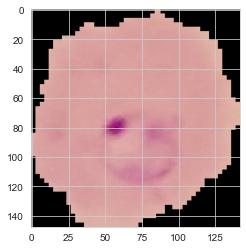

In [12]:
sns.set_style('whitegrid')
plt.imshow(imread(para_cell))

In [13]:
uninfected_cell = train_path + 'uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

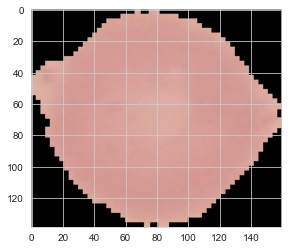

In [14]:
plt.imshow(imread(uninfected_cell))

In [15]:
def check_dimensions(root, container):
    dim1 = []
    dim2 = []
    for image_filename in os.listdir(root + container):
        img = imread(root + container + image_filename)
        d1,d2,color_channel = img.shape
        dim1.append(d1)
        dim2.append(d2)
    return dim1, dim2

In [16]:
dim1, dim2 = check_dimensions(test_path,'uninfected\\')

In [17]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


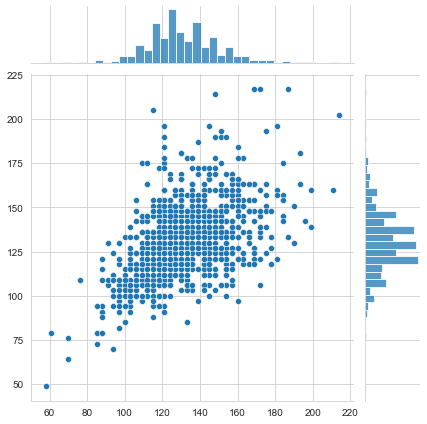

In [18]:
sns.jointplot(x=dim1, y=dim2)

In [19]:
"""
    Convolutional neural network is not going to be able to train
    on various images of different dimensions, so what we have to do is to resize them with the same dimension
    We can do it in different ways
    One way is to use mean value of all dimensions.
    For small photos it will add padding and big one it will shrink or crop them
"""
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130, 130, 3)

In [22]:
"""
Next step: Image manipulation
Something to note is that we'll be working with 130*130*3 = 50700
Which is a large number of data points, so we have to feed in our data in batchs

To perform image manipulations we have to import following library
"""

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [24]:
"""
Something to notice is that our images are scale
for rescale parameter nothing to worry about othersize we should have done it 
like this: rescale=1/255

other params:
shear_range = cutting away part of the image
zoom_range = zoom in the image
fill_mode = decide how to fill in the missing data
"""
uninfected_cell = imread(uninfected_cell)

In [25]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

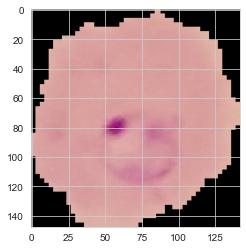

In [26]:
para_img = imread(para_cell)
plt.imshow(para_img)

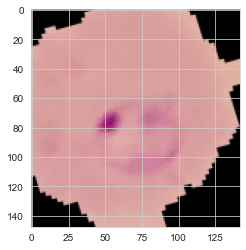

In [27]:
"""
    Now let use our image generator object to do a random transformation
    and we how it is working.
"""
para_img_transformed = image_gen.random_transform(para_img)
plt.imshow(para_img_transformed)

In [28]:
train_path

'..\\cell_images\\train\\'

In [29]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [30]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [65]:
from tensorflow.keras.models import Sequential

In [66]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [67]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2)

In [71]:
batch_size=16

In [72]:
#Binary because we have two classes
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [73]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [58]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [74]:
model.fit(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 616s 395ms/step - loss: 0.9121 - accuracy: 0.5474 - val_loss: 0.6836 - val_accuracy: 0.5762
Epoch 2/20
1560/1560 [==============================] - 597s 383ms/step - loss: 0.6804 - accuracy: 0.5753 - val_loss: 0.6876 - val_accuracy: 0.5569
Epoch 3/20
1560/1560 [==============================] - 586s 376ms/step - loss: 0.6726 - accuracy: 0.5909 - val_loss: 0.6704 - val_accuracy: 0.5923
Epoch 4/20
1560/1560 [==============================] - 573s 368ms/step - loss: 0.6715 - accuracy: 0.5950 - val_loss: 0.6645 - val_accuracy: 0.6085
Epoch 5/20
1560/1560 [==============================] - 629s 403ms/step - loss: 0.6728 - accuracy: 0.5957 - val_loss: 0.6771 - val_accuracy: 0.5996
Epoch 6/20
1560/1560 [==============================] - 626s 401ms/step - loss: 0.6633 - accuracy: 0.6074 - val_loss: 0.6615 - val_accuracy: 0.6154
Epoch 7/20
1560/1560 [==============================] - 593s 380ms/step - loss: 0.6607 - accuracy: 0.6083 - val_

In [75]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

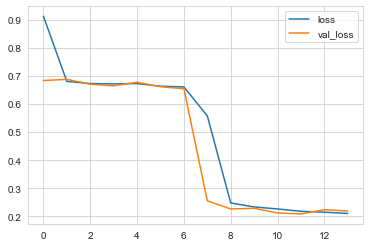

In [76]:
losses[['loss', 'val_loss']].plot()

In [77]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.912133,0.547360,0.683571,0.576154
1,0.680403,0.575287,0.687551,0.556923
2,0.672631,0.590873,0.670410,0.592308
3,0.671516,0.594960,0.664549,0.608462
4,0.672765,0.595681,0.677113,0.599615
5,0.663270,0.607420,0.661503,0.615385
6,0.660738,0.608302,0.654396,0.625385
7,0.557973,0.693846,0.255722,0.915385
8,0.247982,0.920346,0.226705,0.924231
9,0.233891,0.924433,0.229166,0.923077


<AxesSubplot:>

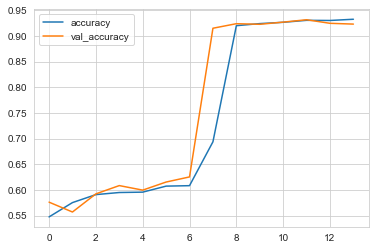

In [78]:
losses[['accuracy', 'val_accuracy']].plot()

In [80]:
len(train_image_gen.classes)

24958

In [81]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [90]:
unique, counts= np.unique(train_image_gen.classes, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 12479]
 [    1 12479]]


In [92]:
model.evaluate(test_image_gen)

163/163 [==============================] - 27s 168ms/step - loss: 0.2249 - accuracy: 0.9242


[0.22491790354251862, 0.9242307543754578]

In [93]:
predictions = model.predict(test_image_gen)

In [94]:
predictions

array([[2.284944e-04],
       [6.863803e-02],
       [8.630276e-03],
       ...,
       [9.542339e-01],
       [9.391993e-01],
       [9.481448e-01]], dtype=float32)

In [95]:
pred = predictions > 0.5

In [96]:
pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
print(classification_report(test_image_gen.classes, pred))
print("\n")
print(confusion_matrix(test_image_gen.classes, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1300
           1       0.89      0.97      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



[[1151  149]
 [  33 1267]]


In [102]:
from tensorflow.keras.preprocessing import image

In [103]:
para_cell

'..\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [123]:
para_cell = '..\\cell_images\\test\\uninfected\\'

In [124]:
os.listdir(para_cell)

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [125]:
my_image = image.load_img(f'{para_cell}C100P61ThinF_IMG_20150918_144104_cell_34.png', target_size=image_shape)

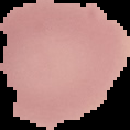

In [126]:
my_image

In [127]:
type(my_image)

PIL.Image.Image

In [128]:
my_image = image.img_to_array(my_image)

In [129]:
my_image.shape

(130, 130, 3)

In [130]:
my_image = np.expand_dims(my_image, axis=0)

In [131]:
my_image.shape

(1, 130, 130, 3)

In [133]:
model.predict(my_image)

array([[0.9560041]], dtype=float32)

In [134]:
model.save('predict_malaria.h5')